In [1]:
import os
import keras

import numpy as np

from keras import models, layers
from keras import optimizers
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(path=os.getcwd()+'/imdb.npz', num_words=10000)

In [24]:
def vectorize(seqs, dim=10000):
    ret = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        ret[i, seq] = 1
    return ret

x_train = vectorize(train_data)
x_test = vectorize(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


batch_size = 128
num_classes = 10
epochs = 20

## Original Model

In [4]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
history_dict = history.history
m_model_loss = history_dict['val_loss']

## Large Model

In [8]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 568us/step - loss: 0.3950 - acc: 0.8279 - val_loss: 0.2798 - val_acc: 0.8869
Epoch 2/20
15000/15000 [==============================] - 8s 507us/step - loss: 0.1601 - acc: 0.9411 - val_loss: 0.3249 - val_acc: 0.8864
Epoch 3/20
15000/15000 [==============================] - 7s 491us/step - loss: 0.0574 - acc: 0.9810 - val_loss: 0.5111 - val_acc: 0.8828
Epoch 4/20
15000/15000 [==============================] - 7s 467us/step - loss: 0.0295 - acc: 0.9937 - val_loss: 0.6950 - val_acc: 0.8801
Epoch 5/20
15000/15000 [==============================] - 7s 479us/step - loss: 0.0302 - acc: 0.9943 - val_loss: 0.7718 - val_acc: 0.8798
Epoch 6/20
15000/15000 [==============================] - 7s 458us/step - loss: 0.0166 - acc: 0.9971 - val_loss: 0.8169 - val_acc: 0.8790
Epoch 7/20
15000/15000 [==============================] - 7s 480us/step - loss: 0.0165 - acc: 0.9971 - val_loss: 0.8933 - 

In [9]:
history_dict = history.history
l_model_loss = history_dict['val_loss']

## Small Model

In [10]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.5703 - acc: 0.7251 - val_loss: 0.4988 - val_acc: 0.8315
Epoch 2/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.4306 - acc: 0.8867 - val_loss: 0.4245 - val_acc: 0.8893
Epoch 3/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.3438 - acc: 0.9241 - val_loss: 0.3695 - val_acc: 0.8899
Epoch 4/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2732 - acc: 0.9418 - val_loss: 0.3414 - val_acc: 0.8859
Epoch 5/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.2144 - acc: 0.9533 - val_loss: 0.3231 - val_acc: 0.8859
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1675 - acc: 0.9602 - val_loss: 0.3469 - val_acc: 0.8782
Epoch 7/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.1309 - acc: 0.9676 - val_loss: 0.3387 - val_ac

In [11]:
history_dict = history.history
s_model_loss = history_dict['val_loss']

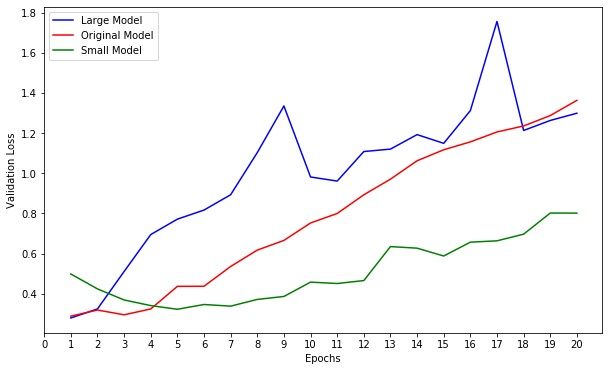

In [47]:
import matplotlib.pyplot as plt

num_epochs = range(1, len(s_model_loss) + 1)

plt.figure(figsize=(10,6))

plt.plot(num_epochs, l_model_loss, 'b', label='Large Model')
plt.plot(num_epochs, m_model_loss, 'r', label='Original Model')
plt.plot(num_epochs, s_model_loss, 'g', label='Small Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.xticks(np.arange(0, 21, step=1))

plt.show()

## 权重正则化

In [25]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16,
                       kernel_regularizer=regularizers.l2(0.001),
                       activation='relu',
                       input_shape=(10000,)))
model.add(layers.Dense(16,
                       kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 222us/step - loss: 0.4718 - acc: 0.8199 - val_loss: 0.3944 - val_acc: 0.8498
Epoch 2/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.2827 - acc: 0.9118 - val_loss: 0.3272 - val_acc: 0.8848
Epoch 3/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.2423 - acc: 0.9269 - val_loss: 0.3421 - val_acc: 0.8782
Epoch 4/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2209 - acc: 0.9369 - val_loss: 0.3580 - val_acc: 0.8799
Epoch 5/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2124 - acc: 0.9416 - val_loss: 0.3731 - val_acc: 0.8687
Epoch 6/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.2004 - acc: 0.9451 - val_loss: 0.3917 - val_acc: 0.8668
Epoch 7/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1917 - acc: 0.9475 - val_loss: 0.3852 - val_

In [26]:
history_dict = history.history
l2_model_loss = history_dict['val_loss']

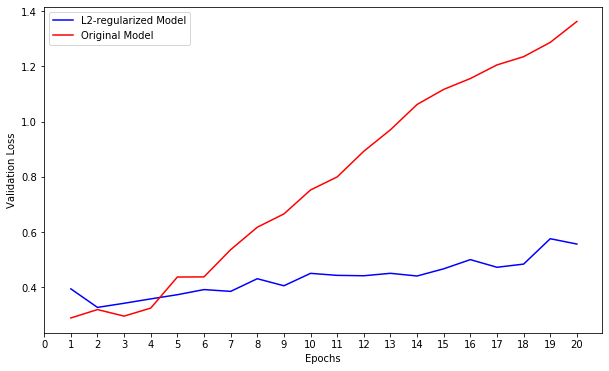

In [48]:
plt.figure(figsize=(10,6))

plt.plot(num_epochs, l2_model_loss, 'b', label='L2-regularized Model')
plt.plot(num_epochs, m_model_loss, 'r', label='Original Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.xticks(np.arange(0, 21, step=1))

plt.show()

## Dropout

In [46]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 267us/step - loss: 0.5691 - acc: 0.6985 - val_loss: 0.3951 - val_acc: 0.8701
Epoch 2/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.3984 - acc: 0.8417 - val_loss: 0.3155 - val_acc: 0.8790
Epoch 3/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.3202 - acc: 0.8864 - val_loss: 0.2827 - val_acc: 0.8905
Epoch 4/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.2710 - acc: 0.9086 - val_loss: 0.2835 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2383 - acc: 0.9178 - val_loss: 0.3016 - val_acc: 0.8914
Epoch 6/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2147 - acc: 0.9291 - val_loss: 0.3183 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2050 - acc: 0.9335 - val_loss: 0.3457 - val_a

In [49]:
history_dict = history.history
dropout_model_loss = history_dict['val_loss']

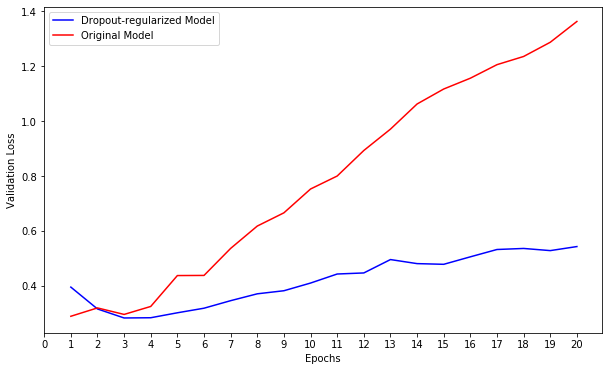

In [50]:
plt.figure(figsize=(10,6))

plt.plot(num_epochs, dropout_model_loss, 'b', label='Dropout-regularized Model')
plt.plot(num_epochs, m_model_loss, 'r', label='Original Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.xticks(np.arange(0, 21, step=1))

plt.show()